<a href="https://colab.research.google.com/github/MounicaSubramanium/CS6220---Data-mining-techniques/blob/master/DS5500_HW3_Mounica_Subramani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from re import match
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Problem 1
- Import and explore the district-level fiscal data from 2015-16.
- Rank and visualize the states that take in the most federal funding (revenue).
- Which states spend the most federal funding per student?# New Section

In [20]:
# Download data

!wget https://nces.ed.gov/ccd/data/zip/sdf16_1a_sas7bdat.zip
!unzip sdf16_1a_sas7bdat.zip
!wget https://www2.ed.gov/about/inits/ed/edfacts/data-files/math-achievement-sch-sy2015-16.csv
!wget https://www2.ed.gov/about/inits/ed/edfacts/data-files/rla-achievement-sch-sy2015-16.csv

--2019-11-11 21:42:56--  https://nces.ed.gov/ccd/data/zip/sdf16_1a_sas7bdat.zip
Resolving nces.ed.gov (nces.ed.gov)... 63.145.228.23, 2001:428:7003:11::23
Connecting to nces.ed.gov (nces.ed.gov)|63.145.228.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4646961 (4.4M) [application/x-zip-compressed]
Saving to: ‘sdf16_1a_sas7bdat.zip.1’

sdf16_1a_sas7bdat.z 100%[===================>]   4.43M   651KB/s    in 7.1s    

2019-11-11 21:43:03 (639 KB/s) - ‘sdf16_1a_sas7bdat.zip.1’ saved [4646961/4646961]

Archive:  sdf16_1a_sas7bdat.zip
replace sdf16_1a.sas7bdat? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2019-11-11 21:45:08--  https://www2.ed.gov/about/inits/ed/edfacts/data-files/math-achievement-sch-sy2015-16.csv
Resolving www2.ed.gov (www2.ed.gov)... 165.224.131.182
Connecting to www2.ed.gov (www2.ed.gov)|165.224.131.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48805549 (47M) [text/csv]
Saving to: ‘math-achievement-sch-sy2015-16.csv

In [21]:
district_fiscal = pd.read_sas('sdf16_1a.sas7bdat', format = 'sas7bdat', encoding="utf-8")
district_fiscal.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,AGCHRT,YEAR,CCDNF,CENFILE,GSLO,GSHI,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,C16,C17,C19,B11,C20,C25,C36,B10,B12,B13,TSTREV,C01,C04,C05,C06,C07,C08,C09,...,FL_Z32,FL_Z33,FL_Z35,FL_Z36,FL_Z37,FL_Z38,FL_V11,FL_V13,FL_V15,FL_V17,FL_V21,FL_V23,FL_V37,FL_V29,FL_Z34,FL_V10,FL_V12,FL_V14,FL_V16,FL_V18,FL_V22,FL_V24,FL_V38,FL_V30,FL_V32,FL_V93,FL_19H,FL_21F,FL_31F,FL_41F,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,0100002,N,01,01073,142,13820,Alabama Youth Services,Alabama,AL,N,3,16,1,0,03,12,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M
1,0100005,01504840100000,01,01095,290,10700,Albertville City,Alabama,AL,03,3,16,1,1,PK,12,5214.0,5214.0,49795000.0,7277000.0,2477000.0,922000.0,128000.0,68000.0,81000.0,137000.0,198000.0,3147000.0,0.0,0.0,0.0,119000.0,28885000.0,24516000.0,34000.0,0.0,338000.0,56000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M
2,0100006,01504800100000,01,01095,290,10700,Marshall County,Alabama,AL,03,3,16,1,1,PK,12,5635.0,5635.0,56422000.0,7747000.0,2678000.0,1186000.0,331000.0,386000.0,114000.0,54000.0,155000.0,2843000.0,0.0,0.0,0.0,0.0,35295000.0,28658000.0,34000.0,0.0,606000.0,25000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M
3,0100007,01503740100000,01,01073,142,13820,Hoover City,Alabama,AL,03,3,16,1,1,KG,12,13910.0,13910.0,168040000.0,6088000.0,1104000.0,2191000.0,146000.0,0.0,116000.0,135000.0,13000.0,2383000.0,0.0,0.0,0.0,0.0,69229000.0,58875000.0,34000.0,0.0,678000.0,48000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M
4,0100008,01504530100000,01,01089,290,26620,Madison City,Alabama,AL,03,3,16,1,1,PK,12,10011.0,10011.0,105927000.0,5007000.0,591000.0,1644000.0,104000.0,0.0,74000.0,56000.0,736000.0,1410000.0,0.0,340000.0,0.0,52000.0,56050000.0,44884000.0,34000.0,0.0,548000.0,26000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M


In [22]:
district_fiscal["TFEDREV"].head()

0         -1.0
1    7277000.0
2    7747000.0
3    6088000.0
4    5007000.0
Name: TFEDREV, dtype: float64

From the documentation "TFEDREV" represents total federal revenue. V33 is the original source for the student membership count. Remove negative values from "TFEDREV".

In [0]:
# Create a boolean variable.
district_fiscal["TFEDREV_bool"] = (district_fiscal["TFEDREV"] > 0)

In [24]:
district_fiscal = district_fiscal[district_fiscal.TFEDREV > 0]
district_fiscal.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,AGCHRT,YEAR,CCDNF,CENFILE,GSLO,GSHI,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,C16,C17,C19,B11,C20,C25,C36,B10,B12,B13,TSTREV,C01,C04,C05,C06,C07,C08,C09,...,FL_Z33,FL_Z35,FL_Z36,FL_Z37,FL_Z38,FL_V11,FL_V13,FL_V15,FL_V17,FL_V21,FL_V23,FL_V37,FL_V29,FL_Z34,FL_V10,FL_V12,FL_V14,FL_V16,FL_V18,FL_V22,FL_V24,FL_V38,FL_V30,FL_V32,FL_V93,FL_19H,FL_21F,FL_31F,FL_41F,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2,TFEDREV_bool
1,0100005,01504840100000,01,01095,290,10700,Albertville City,Alabama,AL,03,3,16,1,1,PK,12,5214.0,5214.0,49795000.0,7277000.0,2477000.0,922000.0,128000.0,68000.0,81000.0,137000.0,198000.0,3147000.0,0.0,0.0,0.0,119000.0,28885000.0,24516000.0,34000.0,0.0,338000.0,56000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M,True
2,0100006,01504800100000,01,01095,290,10700,Marshall County,Alabama,AL,03,3,16,1,1,PK,12,5635.0,5635.0,56422000.0,7747000.0,2678000.0,1186000.0,331000.0,386000.0,114000.0,54000.0,155000.0,2843000.0,0.0,0.0,0.0,0.0,35295000.0,28658000.0,34000.0,0.0,606000.0,25000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M,True
3,0100007,01503740100000,01,01073,142,13820,Hoover City,Alabama,AL,03,3,16,1,1,KG,12,13910.0,13910.0,168040000.0,6088000.0,1104000.0,2191000.0,146000.0,0.0,116000.0,135000.0,13000.0,2383000.0,0.0,0.0,0.0,0.0,69229000.0,58875000.0,34000.0,0.0,678000.0,48000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M,True
4,0100008,01504530100000,01,01089,290,26620,Madison City,Alabama,AL,03,3,16,1,1,PK,12,10011.0,10011.0,105927000.0,5007000.0,591000.0,1644000.0,104000.0,0.0,74000.0,56000.0,736000.0,1410000.0,0.0,340000.0,0.0,52000.0,56050000.0,44884000.0,34000.0,0.0,548000.0,26000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M,True
6,0100011,01503710100000,01,01073,142,13820,Leeds City,Alabama,AL,03,3,16,1,1,KG,12,1905.0,1905.0,27699000.0,1522000.0,415000.0,407000.0,73000.0,0.0,22000.0,14000.0,10000.0,581000.0,0.0,0.0,0.0,0.0,10713000.0,8883000.0,34000.0,0.0,102000.0,7000.0,0.0,0.0,...,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,A,R,R,I,M,M,R,R,R,M,M,M,M,M,True


In [0]:
grouped_df = district_fiscal.groupby("STNAME")["TFEDREV"].sum().sort_values(ascending=False)

In [26]:
grouped_df.head(51)

STNAME
California              7.709275e+09
Texas                   6.194317e+09
New York                3.374794e+09
Florida                 3.147329e+09
Illinois                2.334945e+09
Pennsylvania            2.037315e+09
Ohio                    1.837963e+09
Georgia                 1.815242e+09
Michigan                1.731034e+09
North Carolina          1.587976e+09
Arizona                 1.302010e+09
New Jersey              1.249741e+09
Louisiana               1.115619e+09
Washington              1.098332e+09
Tennessee               1.096182e+09
Virginia                1.058146e+09
Indiana                 1.015476e+09
Missouri                9.599780e+08
Kentucky                8.802960e+08
South Carolina          8.608670e+08
Maryland                8.235990e+08
Massachusetts           8.045950e+08
Alabama                 8.039070e+08
Wisconsin               7.826470e+08
Colorado                7.217190e+08
Oklahoma                7.032250e+08
Mississippi             6.90724

Text(0.5, 1.0, 'The states that take in the most federal funding (revenue)')

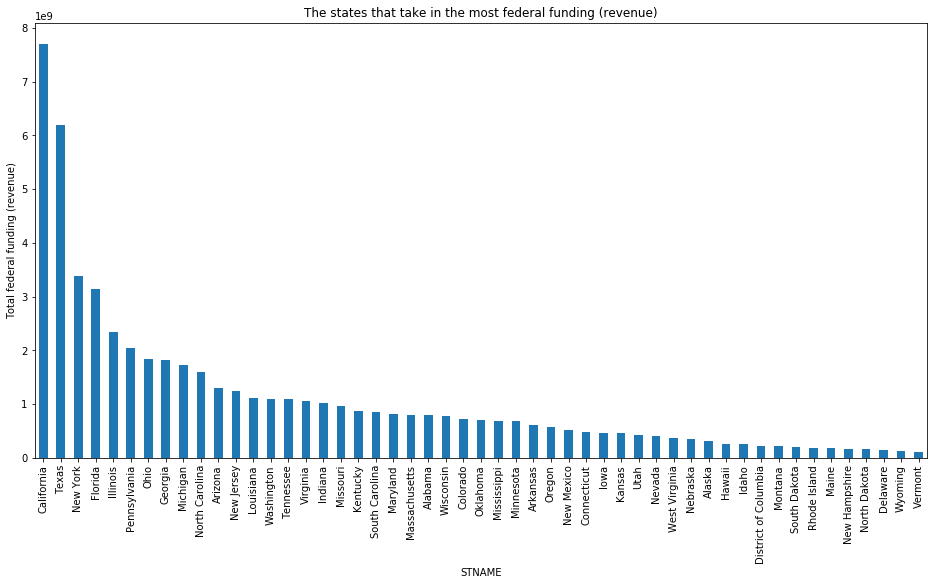

In [27]:
plt.figure(figsize=(16,8))
grouped_df.plot.bar()
plt.ylabel('Total federal funding (revenue)')
plt.title("The states that take in the most federal funding (revenue)")

In [28]:
grouped_df1 = district_fiscal[["STNAME", "TOTALEXP", "V33"]].groupby(['STNAME']).sum().reset_index()
grouped_df1["spent"] = round(grouped_df1['TOTALEXP'] / grouped_df1['V33'])

grouped_df1 = grouped_df1.sort_values(by="spent",ascending=False)

grouped_df1.head()

,STNAME,TOTALEXP,V33,spent
8,District of Columbia,2.247392e+09,82962.0,27089.0
45,Vermont,1.585076e+09,59806.0,26504.0
32,New York,6.842094e+10,2591958.0,26397.0
30,New Jersey,3.042769e+10,1407891.0,21612.0
50,Wyoming,2.034229e+09,94511.0,21524.0


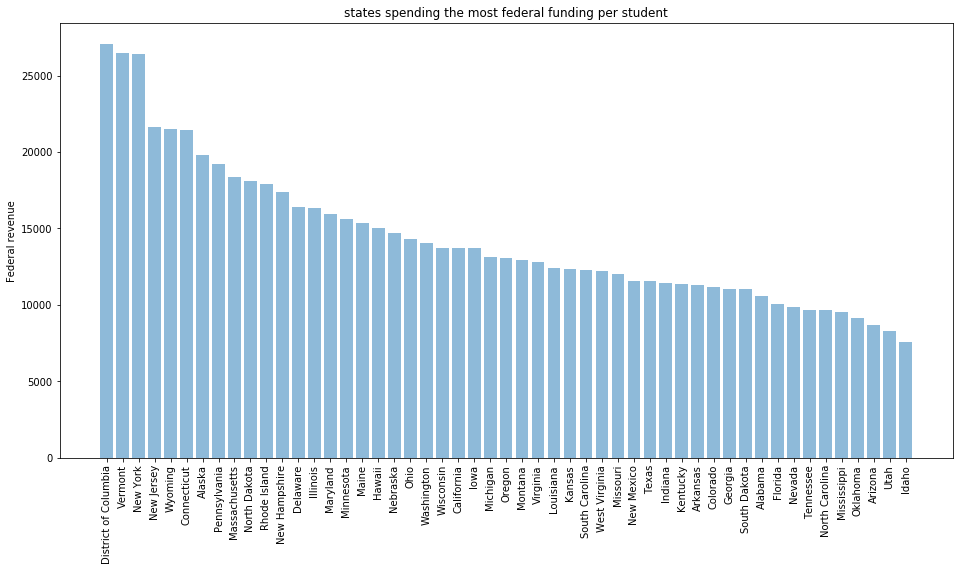

In [29]:
plt.figure(figsize=(16,8))
plt.bar(grouped_df1.STNAME, grouped_df1.spent, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Federal revenue')
plt.title('states spending the most federal funding per student')

plt.show()


- DC spends the most federal funding per student.
- Vermont and New york are at the same level of spending their federal funds per student.

### Problem 2
- Visualize the relationship between school districts’ total revenue and expenditures.
- Which states have the most debt per student?

In [30]:
grouped_df2 = district_fiscal[["STNAME", "TOTALEXP", "TOTALREV", "V33", "TFEDREV"]].groupby(['STNAME']).sum().reset_index()
grouped_df2.head()

,STNAME,TOTALEXP,TOTALREV,V33,TFEDREV
0,Alabama,7.864636e+09,7.607098e+09,743789.0,8.039070e+08
1,Alaska,2.623014e+09,2.494691e+09,132477.0,3.073200e+08
2,Arizona,9.346841e+09,9.830650e+09,1078838.0,1.302010e+09
3,Arkansas,5.541889e+09,5.513815e+09,491251.0,6.069460e+08
4,California,8.520648e+10,8.911095e+10,6203559.0,7.709275e+09


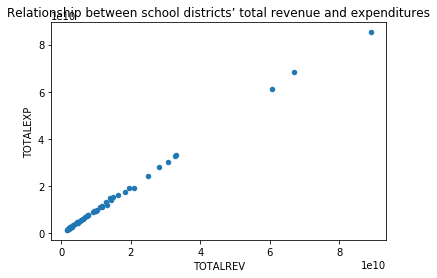

In [31]:
grouped_df2.plot(kind='scatter',x='TOTALREV',y='TOTALEXP',
                      title= "Relationship between school districts’ total revenue and expenditures")

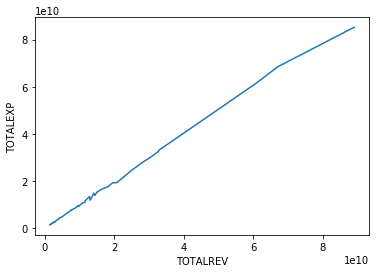

In [32]:
sns.lineplot(x="TOTALREV", y="TOTALEXP", data=grouped_df2)

In [33]:
grouped_df2["Debt_per_student"] = (grouped_df2["TOTALEXP"] - grouped_df2["TOTALREV"])/grouped_df2["V33"]
# print(grouped_df2.head())

# remove negative values

grouped_df2 = grouped_df2[grouped_df2.Debt_per_student > 0]
grouped_df2 = grouped_df2.sort_values(by="Debt_per_student",ascending=False)
grouped_df2.head()

,STNAME,TOTALEXP,TOTALREV,V33,TFEDREV,Debt_per_student
34,North Dakota,1.962859e+09,1.787486e+09,108285.0,155453000.0,1619.550261
8,District of Columbia,2.247392e+09,2.138284e+09,82962.0,226202000.0,1315.156337
1,Alaska,2.623014e+09,2.494691e+09,132477.0,307320000.0,968.643614
27,Nebraska,4.640422e+09,4.398811e+09,315520.0,346826000.0,765.754944
23,Minnesota,1.346411e+10,1.286921e+10,861784.0,685055000.0,690.317992


North Dakota and DC has the highest debt per student.

### Problem 3
- The district-level performance metrics from EDFacts may be useful in your decision.
- However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In addition, censored and missing data must be imputed.
- Write and explain a function for processing a single column of “blurred”metrics into usable numeric values.
- Use it to process and then visualize the distribution of a performance metric of your choice.

In [0]:
math_ach_data = pd.read_csv('math-achievement-sch-sy2015-16.csv',error_bad_lines=False, index_col=False, dtype='unicode')
arts_ach_data  = pd.read_csv('rla-achievement-sch-sy2015-16.csv',error_bad_lines=False, index_col=False, dtype='unicode')

In [35]:
math_ach_data.head()

,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,MAM_MTH00PCTPROF_1516,MAS_MTH00NUMVALID_1516,MAS_MTH00PCTPROF_1516,MBL_MTH00NUMVALID_1516,MBL_MTH00PCTPROF_1516,MHI_MTH00NUMVALID_1516,MHI_MTH00PCTPROF_1516,MTR_MTH00NUMVALID_1516,MTR_MTH00PCTPROF_1516,MWH_MTH00NUMVALID_1516,MWH_MTH00PCTPROF_1516,F_MTH00NUMVALID_1516,F_MTH00PCTPROF_1516,M_MTH00NUMVALID_1516,M_MTH00PCTPROF_1516,CWD_MTH00NUMVALID_1516,CWD_MTH00PCTPROF_1516,ECD_MTH00NUMVALID_1516,ECD_MTH00PCTPROF_1516,LEP_MTH00NUMVALID_1516,LEP_MTH00PCTPROF_1516,HOM_MTH00NUMVALID_1516,HOM_MTH00PCTPROF_1516,MIG_MTH00NUMVALID_1516,MIG_MTH00PCTPROF_1516,ALL_MTH03NUMVALID_1516,ALL_MTH03PCTPROF_1516,ALL_MTH04NUMVALID_1516,ALL_MTH04PCTPROF_1516,ALL_MTH05NUMVALID_1516,...,LEP_MTH04NUMVALID_1516,LEP_MTH04PCTPROF_1516,LEP_MTH05NUMVALID_1516,LEP_MTH05PCTPROF_1516,LEP_MTH06NUMVALID_1516,LEP_MTH06PCTPROF_1516,LEP_MTH07NUMVALID_1516,LEP_MTH07PCTPROF_1516,LEP_MTH08NUMVALID_1516,LEP_MTH08PCTPROF_1516,LEP_MTHHSNUMVALID_1516,LEP_MTHHSPCTPROF_1516,HOM_MTH03NUMVALID_1516,HOM_MTH03PCTPROF_1516,HOM_MTH04NUMVALID_1516,HOM_MTH04PCTPROF_1516,HOM_MTH05NUMVALID_1516,HOM_MTH05PCTPROF_1516,HOM_MTH06NUMVALID_1516,HOM_MTH06PCTPROF_1516,HOM_MTH07NUMVALID_1516,HOM_MTH07PCTPROF_1516,HOM_MTH08NUMVALID_1516,HOM_MTH08PCTPROF_1516,HOM_MTHHSNUMVALID_1516,HOM_MTHHSPCTPROF_1516,MIG_MTH03NUMVALID_1516,MIG_MTH03PCTPROF_1516,MIG_MTH04NUMVALID_1516,MIG_MTH04PCTPROF_1516,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,01,0100005,Albertville City,010000500870,Ala Avenue Middle Sch,14APR17,707,36,2,PS,1,PS,16,LE20,283,25-29,22,21-39,381,45,347,39,360,34,46,LE10,303,27,64,LE5,16,LE20,39,LE10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35,LE10,29,LE20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,LT50,9,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,21-39,20,LE20,NaN,NaN
1,ALABAMA,01,0100005,Albertville City,010000500871,Albertville High Sch,14APR17,307,15,.,.,2,PS,9,LT50,114,6-9,5,PS,177,20-24,161,15-19,146,10-14,11,LT50,109,6-9,14,LT50,4,PS,8,LT50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LT50
2,ALABAMA,01,0100005,Albertville City,010000500879,Evans Elem Sch,14APR17,772,43,2,PS,6,GE50,29,21-39,333,33,12,LT50,389,52,389,46,383,40,56,20-29,367,33,54,LE10,14,LT50,44,11-19,NaN,NaN,NaN,NaN,395,...,NaN,NaN,31,LE10,23,LE20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LT50,6,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,LE20,16,LE20,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,01,0100005,Albertville City,010000500889,Albertville Elem Sch,14APR17,852,55,1,PS,3,PS,20,LE20,433,47,22,40-59,370,67,421,54,431,57,46,20-29,468,48,146,25-29,10,LT50,47,20-29,446,63,406,47,NaN,...,48,LE10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,PS,5,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,40-59,20,LE20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,01,0100006,Marshall County,010000600193,Kate Duncan Smith DAR Middle,14APR17,443,36,4,PS,6,LT50,4,PS,12,LT50,NaN,NaN,417,37,206,30-34,237,35-39,67,6-9,279,25-29,3,PS,35,11-19,NaN,NaN,NaN,NaN,NaN,NaN,103,...,NaN,NaN,2,PS,1,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,LE20,6,GE50,7,LT50,6,LT50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ALL_MTH00PCTPROF_1516: percentage of students over the proficiency

It has values like GE80 meaning greater than or equal to 80, LT50 meaning less than 50, in the range of 65-69. PS, nan denoting missing values. We need to handle them by following techniques.

- GE80 or GT20 can be written as mean of 81 and 21 respectively.
- LE60 or LT30 can be written as mean of 59 and 29 respectively.
- Range values like 65 - 85 which will be replaced by the mean of 65 and 85.

In [0]:
s = math_ach_data['ALL_MTH00PCTPROF_1516']

In [0]:
def processing(dframe, col):
    empty = []
#     column = column.astype(str)
    column = dframe[col]
    for x in column:
        if bool(re.search('-', x)):
            val1 = int(x.split('-')[0])
            val2 = int(x.split('-')[1])
            val = int((val1 + val2)/2)
        elif bool(re.search('PS', x)):
            val = np.nan
        elif bool(re.search(r"L.*", x)):
            v1 = int(x[2:])
            val = int((v1-1)/2)
        elif bool(re.search(r"G.*", x)):
            v2 = int(x[2:])
            val = int((v2+1)/2)        
        else:
            val = int(x)
        empty.append(val)
#     dframe[col+"processed"] = empty
#     return dframe
    return empty

In [38]:
ALL_MTH00PCTPROF_1516_processed = processing(math_ach_data, 'ALL_MTH00PCTPROF_1516')
# math_processed_data
unblurred = np.asarray(ALL_MTH00PCTPROF_1516_processed)
unblurred = pd.DataFrame(unblurred)
unblurred.head()

,0
0,36.0
1,15.0
2,43.0
3,55.0
4,36.0


Text(0.5, 1.0, 'Histogram of percentage students over the proficiency in math')

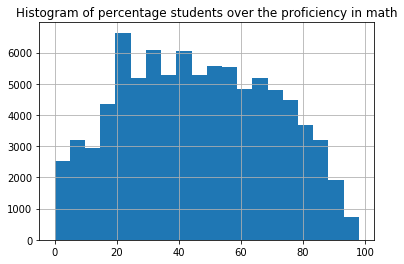

In [39]:
unblurred.hist(bins=20)
plt.title('Histogram of percentage students over the proficiency in math')

### Problem 4
- You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts.
- How much money is this?
- Choose which school districts will have their funding cut and how this will be done. (You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut –you do not need print the entire table.)

In [40]:
Tot_fed_budget=district_fiscal['TFEDREV'].sum()
print("Total federal budget currently being spent onfunding school districts is $",Tot_fed_budget)  

Total federal budget currently being spent onfunding school districts is $ 55602742000.0


In [41]:
cutting_budget_amt = Tot_fed_budget*0.15
print("15% of the U.S. federal budget in funding school districts is $",cutting_budget_amt)

15% of the U.S. federal budget in funding school districts is $ 8340411300.0


In [42]:
remaining = Tot_fed_budget - cutting_budget_amt
print("Remaining U.S. federal budget is $",remaining)

Remaining U.S. federal budget is $ 47262330700.0


In [0]:
data_q4 = district_fiscal[['NAME','STABBR','LEAID','TOTALEXP','TOTALREV','TFEDREV']].reset_index()

If the difference is positive then the revenue is greater than the expenditure and those districts funding has to be cut down

In [46]:

data_q4['difference']=data_q4['TOTALREV'] - data_q4['TOTALEXP']
data_q4.head()

,index,NAME,STABBR,LEAID,TOTALEXP,TOTALREV,TFEDREV,difference
0,1,Albertville City,AL,0100005,46778000.0,49795000.0,7277000.0,3017000.0
1,2,Marshall County,AL,0100006,64739000.0,56422000.0,7747000.0,-8317000.0
2,3,Hoover City,AL,0100007,165436000.0,168040000.0,6088000.0,2604000.0
3,4,Madison City,AL,0100008,101154000.0,105927000.0,5007000.0,4773000.0
4,6,Leeds City,AL,0100011,32285000.0,27699000.0,1522000.0,-4586000.0


The difference amount is the surplus amount left for each school district and it is added together so that is the left out amount with is neither spent nor used by those school districts for that year.

In [47]:
available_amount = data_q4['difference'].sum()

available_amount

# the cutting budget amount is the 15% of total federal revenue and it is divided by the available amount from the total revenue 
# to calculate the amount to be cut from each school district
print(" percentage of amount to be cut from the revenue is ",cutting_budget_amt/available_amount)


 percentage of amount to be cut from the revenue is  1.458130943142166


In [0]:
# data_q4["difference"] = (data_q4["difference"] > 0)

data_q4_cropped = data_q4[data_q4.difference > 0]

In [49]:
# the total revenue is greater than the total expenditure for these districts
data_q4_cropped.head(10)

,index,NAME,STABBR,LEAID,TOTALEXP,TOTALREV,TFEDREV,difference
0,1,Albertville City,AL,0100005,46778000.0,49795000.0,7277000.0,3017000.0
2,3,Hoover City,AL,0100007,165436000.0,168040000.0,6088000.0,2604000.0
3,4,Madison City,AL,0100008,101154000.0,105927000.0,5007000.0,4773000.0
5,7,Boaz City,AL,0100012,22413000.0,22813000.0,2457000.0,400000.0
7,21,Alexander City,AL,0100030,29642000.0,32454000.0,3717000.0,2812000.0
8,36,Andalusia City,AL,0100060,15978000.0,18650000.0,2360000.0,2672000.0
18,60,Pike Road,AL,0100195,8943000.0,9473000.0,326000.0,530000.0
19,62,Auburn City,AL,0100210,131695000.0,134959000.0,4440000.0,3264000.0
20,63,Autauga County,AL,0100240,76672000.0,80867000.0,7447000.0,4195000.0
21,64,Baldwin County,AL,0100270,299880000.0,338236000.0,23710000.0,38356000.0


In [50]:
data_q4_cropped['CUT'] = (1.45)*data_q4_cropped['difference']
data_q4_cropped[['LEAID','CUT']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LEAID,CUT
0,0100005,4374650.0
2,0100007,3775800.0
3,0100008,6920850.0
5,0100012,580000.0
7,0100030,4077400.0
...,...,...
16534,5605762,4944500.0
16535,5605820,245050.0
16536,5605830,414700.0
16537,5606090,192850.0


#### Problem 5
Provide a statement for your supervisor justifying your decisions on which school districts will lose funding

- The school districticts whose total expenditure is less than the total revenue will be loosing funds because, there are few schools whose expenditure is higher than the revenue. So, it is irrational to cut their funding. We can always check this difference between expenditure and revenue, if the differrence is minimal, that school district can be spared from losing its funds.